#  Import data into Python environment.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date']) #convereting the date column into date time object as it was only object 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

# - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [7]:
def month(x):
    month = x.split('-')[1]
    return month

In [8]:
df['Month'] = df['Date_month_year'].apply(month)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Month'>

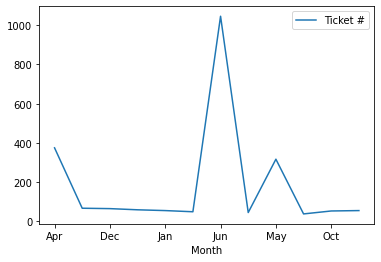

In [9]:
df.groupby('Month').count()[['Ticket #']].plot()

In [10]:
def month(x):
    month = x.split('-')[0]
    return month

In [11]:
df['Day'] = df['Date_month_year'].apply(month)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Day'>

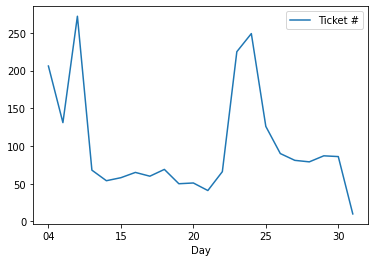

In [12]:
df.groupby('Day').count()[['Ticket #']].plot()

# - Provide a table with the frequency of complaint types.

In [13]:
df['Customer Complaint'].value_counts()

Comcast                                                                       83
Comcast Internet                                                              18
Comcast Data Cap                                                              17
comcast                                                                       13
Data Caps                                                                     11
                                                                              ..
Comcast bundling of internet and tv services and deceptive sales practices     1
Comcast refuses to recognize our same sex marriage                             1
Comcast speed and billing                                                      1
Internet being slowed.                                                         1
Modem rental fees                                                              1
Name: Customer Complaint, Length: 1841, dtype: int64

# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [14]:
df['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

# - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [15]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [16]:
def status(x):
    if x in['Open' , 'Pending']:
        return 'Open'
    if x in['Closed' , 'Solved']:
        return 'Closed'

In [17]:
df['New_Status'] = df['Status'].apply(status)

In [18]:
df  #column for new status appeared with open and close values

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,New_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,04,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,05,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Feb,04,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Feb,06,Closed
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Sep,06,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Jun,23,Closed


# - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [20]:
 lm = df[['State' , 'Ticket #' , 'New_Status']].groupby(['State' , 'New_Status']).count().sort_values('Ticket #')  

In [21]:
lm

,,Ticket #
State,New_Status,
Nevada,Closed,1
District of Columbia,Closed,1
Montana,Closed,1
Iowa,Closed,1
Kansas,Closed,1
...,...,...
Pennsylvania,Closed,110
Illinois,Closed,135
California,Closed,159


In [22]:
lm.reset_index()

,State,New_Status,Ticket #
0,Nevada,Closed,1
1,District of Columbia,Closed,1
2,Montana,Closed,1
3,Iowa,Closed,1
4,Kansas,Closed,1
...,...,...,...
72,Pennsylvania,Closed,110
73,Illinois,Closed,135
74,California,Closed,159
75,Florida,Closed,201


In [23]:
lm = lm.pivot_table(index = 'State' , columns = 'New_Status' , values = 'Ticket #').fillna(0).reset_index() 

In [24]:
lm

New_Status,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0
5,Connecticut,9.0,3.0
6,Delaware,8.0,4.0
7,District Of Columbia,14.0,2.0
8,District of Columbia,1.0,0.0
9,Florida,201.0,39.0


In [25]:
import matplotlib.pyplot as plt

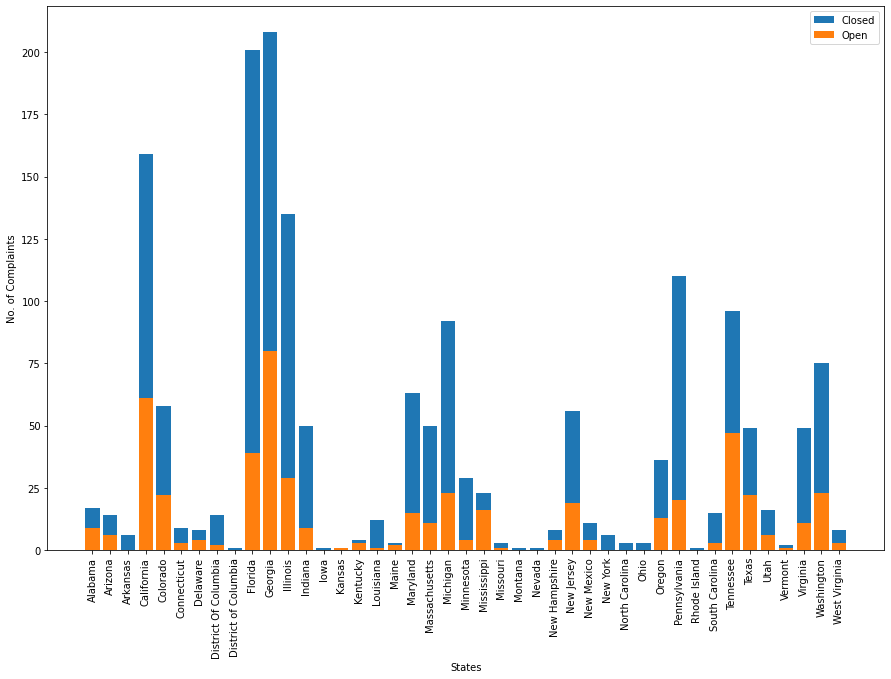

In [26]:
fig = plt.figure(figsize = (15 , 10))
plt.bar(lm['State'] , lm['Closed'] , label = 'Closed')
plt.bar(lm['State'] , lm['Open'] , label = 'Open')
plt.xticks(rotation = 90) 
plt.legend() 
plt.xlabel('States')
plt.ylabel('No. of Complaints')
plt.show()

# Which state has the maximum complaints

In [28]:
column = lm['Open']
max_value = column.max()
print(max_value)

80.0


# Which state has the highest percentage of unresolved complaints

In [29]:
df['Open/Closed'] = df['Status']

In [31]:
sc = df.groupby(['State', 'Open/Closed'])['Open/Closed'].count().unstack().fillna(0)
sc = pd.DataFrame(sc)
sc.head()

Open/Closed,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,0.0,0.0,5.0
California,72.0,47.0,14.0,87.0
Colorado,23.0,12.0,10.0,35.0


In [32]:
sc['unresolved complaint'] = (sc['Open']/sc['Closed']*100)

In [33]:
sc.head().max()

Open/Closed
Closed                  72.000000
Open                    47.000000
Pending                 14.000000
Solved                  87.000000
unresolved complaint    65.277778
dtype: float64

# - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [41]:
resolved_complaint = df.groupby(['Received Via','Open/Closed'])['Received Via'].count().unstack().fillna(0)


In [42]:
resolved_complaint

Open/Closed,Closed,Open,Pending,Solved
Received Via,,,,
Customer Care Call,387,186,69,477
Internet,347,177,85,496


In [43]:
t_resolved_complaint = len(df)
t_resolved_complaint

2224

In [44]:
for x in resolved_complaint.values:
    l=(x/t_resolved_complaint*100)
    print(l)

[17.40107914  8.36330935  3.10251799 21.44784173]
[15.60251799  7.95863309  3.82194245 22.30215827]


## Thank You